In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [127]:
train = pd.read_csv(r'C:\ML Projects\Project2\train.csv')
test = pd.read_csv(r'C:\ML Projects\Project2\test.csv')

In [128]:
test['Survived']=0
df=pd.concat([train,test]).reset_index()
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [129]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 133.1+ KB


In [131]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [132]:
pd.crosstab(train.Sex,train.Embarked)

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [133]:
train.groupby(['Pclass','Sex','Survived'])['Embarked'].value_counts()

Pclass  Sex     Survived  Embarked
1       female  0         S             2
                          C             1
                1         S            46
                          C            42
                          Q             1
        male    0         S            51
                          C            25
                          Q             1
                1         S            28
                          C            17
2       female  0         S             6
                1         S            61
                          C             7
                          Q             2
        male    0         S            82
                          C             8
                          Q             1
                1         S            15
                          C             2
3       female  0         S            55
                          Q             9
                          C             8
                1         S            33

In [134]:
df.Embarked.fillna('S',inplace=True)

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [136]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [137]:
df.drop('Cabin',axis=1,inplace=True)
train.drop('Cabin',axis=1,inplace=True)


In [138]:
df.Age.fillna(df.Age.median(),inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1309 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 122.8+ KB


In [140]:
df.Fare.fillna(df.Fare.mean(),inplace=True)

In [141]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


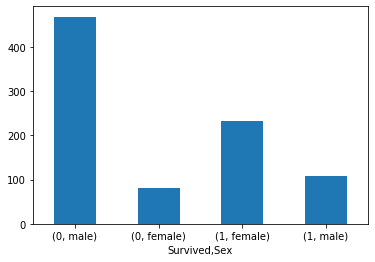

In [142]:
train.groupby(['Survived'])['Sex'].value_counts().plot(kind='bar',rot=0)

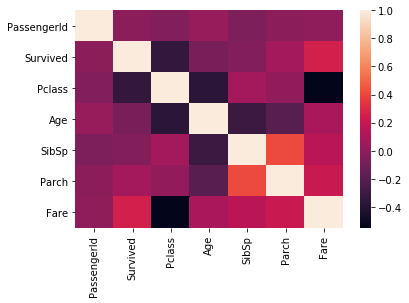

In [143]:
sns.heatmap(train.corr())

In [144]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [145]:
col = ['Survived','Age','Fare']

In [146]:
df1=pd.DataFrame(data=train,columns=col)
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


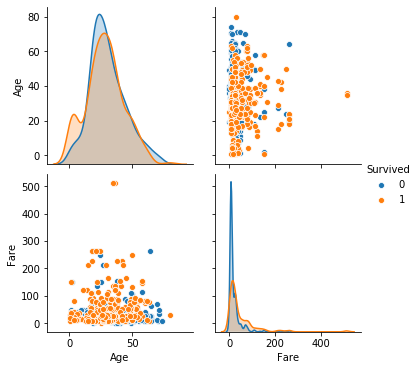

In [147]:
sns.pairplot(df1,hue='Survived')

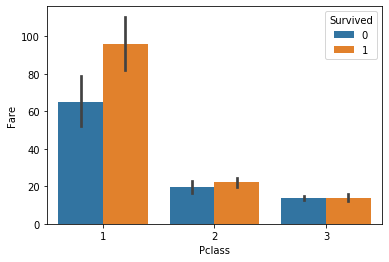

In [148]:
sns.barplot(data=train,hue='Survived',y='Fare',x='Pclass')

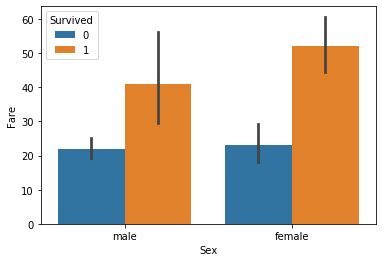

In [149]:
sns.barplot(data=train,hue='Survived',y='Fare',x='Sex')

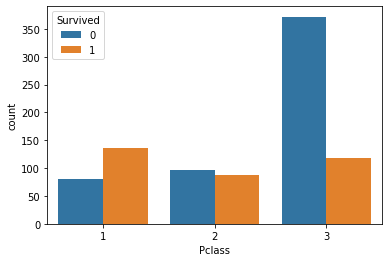

In [150]:
sns.countplot(data=train,hue='Survived',x='Pclass')

In [151]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

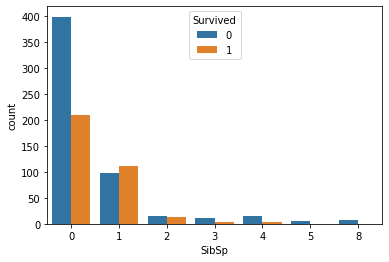

In [152]:
sns.countplot(data=train,hue='Survived',x='SibSp')

In [153]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

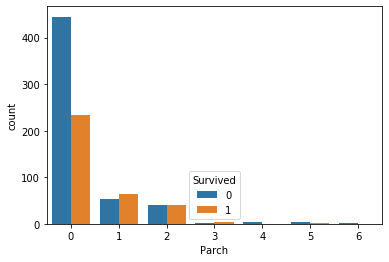

In [154]:
sns.countplot(data=train,hue='Survived',x='Parch')

In [155]:
y = train['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])

In [156]:
X['Fare']=train['Fare']
X

,Pclass,SibSp,Parch,Sex_female,Sex_male,Fare
0,3,1,0,0,1,7.2500
1,1,1,0,1,0,71.2833
2,3,0,0,1,0,7.9250
3,1,1,0,1,0,53.1000
4,3,0,0,0,1,8.0500
...,...,...,...,...,...,...
886,2,0,0,0,1,13.0000
887,1,0,0,1,0,30.0000
888,3,1,2,1,0,23.4500
889,1,0,0,0,1,30.0000


In [157]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [158]:
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [159]:
result=pd.DataFrame({'Predicted':predictions,'Actual':y_test})
result.head(20)

,Predicted,Actual
709,0,1
439,0,0
840,0,0
720,1,1
39,0,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [160]:
Xtest = pd.get_dummies(df[891:][features])
Xtest['Fare']=df[891:]['Fare']

In [161]:
model.fit(X,y)
predictions1 = model.predict(Xtest)
predictions1.shape

(418,)

In [162]:
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions1})

In [163]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [164]:
submission.to_csv('Submission1.csv',index=False)